# 3 - 风控模型构建
----

### 目录：

[Logistic 回归](#Logistic-回归)

[随机森林](#随机森林)

[SVM](#SVM)

[MLP](#MLP)

[GBDT](#GBDT)

[KNN](#KNN)

[模型综合评估](#模型综合评估)

## 初始化
----

In [1]:
# import 必要模块
import json

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import hyperopt
import re

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.utils.testing import ignore_warnings

import cookdata_util as cutil

In [2]:
# 定义常量
PREFIX = './数据/'
DATA_EXPORT_TO = PREFIX + '预处理结果/'
RANDOM_STATE = 233

In [3]:
# 初始化环境
cutil.init_pd_plt()
cutil.set_constant({
    'PREFIX': PREFIX,
    'DATA_LOAD_FROM': DATA_EXPORT_TO,
    'RANDOM_STATE': RANDOM_STATE
})

In [4]:
# 4、定义全局变量容器
glbl = cutil.MyGlobals()

In [5]:
# 定义存储已建好模型的容器
trained_models = cutil.MyGlobals()
evaluate_models = cutil.MyGlobals()

In [6]:
# 5、加载测试集
# test_packs：X_train, X_test, y_train, y_test
# test_validate_pack: X_train, X_validate, X_test, y_train, y_validate, y_test
test_packs, test_validate_packs, test_data_cols = dict(), dict(), dict()
cutil.load_data_into(test_packs, test_validate_packs, test_data_cols=test_data_cols)

正在加载： cut(data)
正在加载： minmax(data)
正在加载： minmax(pca(std(data)))
正在加载： pca(std(data))
正在加载： qcut(data)
正在加载： raw_data
正在加载： std(data)


In [7]:
# 工具函数
def anonymous_func():
    sns.set(style="darkgrid")
    
    return test_data_cols

anonymous_func()

{'cut(data)': ['Han',
  'inCourt',
  'isBlackList',
  'isCrime',
  'isDue',
  'maritalStatus_0',
  'maritalStatus_1',
  'maritalStatus_2',
  'education_0',
  'education_1',
  'education_2',
  'education_3',
  'education_4',
  'idVerify_0',
  'idVerify_1',
  'idVerify_2',
  'threeVerify_0',
  'threeVerify_1',
  'threeVerify_2',
  'netLength_0',
  'netLength_1',
  'netLength_2',
  'netLength_3',
  'netLength_4',
  'sex_0',
  'sex_1',
  'sex_2',
  'CityId_1',
  'CityId_2',
  'CityId_3',
  'age_0',
  'age_1',
  'age_2',
  'age_3',
  'age_4',
  'card_age_0',
  'card_age_1',
  'card_age_2',
  'card_age_3',
  'card_age_4',
  'cashAmt_mean_0',
  'cashAmt_mean_1',
  'cashAmt_mean_2',
  'cashAmt_mean_3',
  'cashAmt_mean_4',
  'cashAmt_non_null_months_0',
  'cashAmt_non_null_months_1',
  'cashAmt_non_null_months_2',
  'cashAmt_non_null_months_3',
  'cashAmt_non_null_months_4',
  'cashCnt_mean_0',
  'cashCnt_mean_1',
  'cashCnt_mean_2',
  'cashCnt_mean_3',
  'cashCnt_mean_4',
  'cashCnt_non_null_m

## Logistic 回归
----

In [8]:
def anonymous_func():
    glbl.logistic_default_res = cutil.default_param_on_model(
        LogisticRegression(solver='liblinear', max_iter=1000),
        test_packs)
    cutil.dump_to_json(glbl.logistic_default_res, 'Logistic-DataPrefer')
    
anonymous_func()

cut(data): {'test auc': 0.842211, 'train auc': 0.846763, 'time': 0.750364}
minmax(data): {'test auc': 0.843251, 'train auc': 0.840267, 'time': 0.855122}
minmax(pca(std(data))): {'test auc': 0.846692, 'train auc': 0.836392, 'time': 0.611791}
pca(std(data)): {'test auc': 0.892109, 'train auc': 0.885484, 'time': 1.952722}
qcut(data): {'test auc': 0.922447, 'train auc': 0.920222, 'time': 0.42026}
raw_data: {'test auc': 0.834311, 'train auc': 0.831458, 'time': 22.317919}
std(data): {'test auc': 0.892147, 'train auc': 0.88551, 'time': 1.141662}


In [12]:
pd.DataFrame.from_dict(glbl.logistic_default_res, orient='index')

,test auc,train auc,time
cut(data),0.842211,0.846763,0.750364
minmax(data),0.843251,0.840267,0.855122
minmax(pca(std(data))),0.846692,0.836392,0.611791
pca(std(data)),0.892109,0.885484,1.952722
qcut(data),0.922447,0.920222,0.420260
raw_data,0.834311,0.831458,22.317919
std(data),0.892147,0.885510,1.141662


In [9]:
@cutil.time_it
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['qcut(data)']
    
    logi = LogisticRegression(
        solver='liblinear', max_iter=1000,
        penalty='l2', C=0.6)
    logi.fit(X_train, y_train)
    return cutil.is_model_fit(logi, test_packs['qcut(data)'])

anonymous_func()


[Function executed for: 0.447109s]



{'test auc': 0.922416, 'train auc': 0.920164}

In [11]:
@cutil.time_it
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['qcut(data)']
    
    logi = LogisticRegression(
        solver='liblinear', max_iter=1000, C=1e-11)
    logi.fit(X_train, y_train)
    return cutil.is_model_fit(logi, test_packs['qcut(data)'])

anonymous_func()


[Function executed for: 0.129994s]



{'test auc': 0.588723, 'train auc': 0.603216}

In [10]:
@cutil.time_it
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['qcut(data)']

    tuned_parameters = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 10, 100]
    }
    gs_logi = GridSearchCV(
        estimator=LogisticRegression(
            solver='liblinear', max_iter=1000),
        param_grid=tuned_parameters,
        scoring='roc_auc', n_jobs=4, cv=4, verbose=2)
    gs_logi.fit(X_train, y_train)
    
    glbl.gs_logi = gs_logi
    print(gs_logi.best_score_, gs_logi.best_params_)
    print(cutil.is_model_fit(gs_logi.best_estimator_, test_packs['qcut(data)']))

anonymous_func()

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.4s finished


0.9170762795407308 {'C': 100, 'penalty': 'l2'}
{'test auc': 0.922489, 'train auc': 0.920303}

[Function executed for: 15.096934s]



In [10]:
@cutil.time_it
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['qcut(data)']

    tuned_parameters = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 10, 100]
    }
    gs_logi = GridSearchCV(
        estimator=LogisticRegression(
            solver='liblinear', max_iter=1000),
        param_grid=tuned_parameters,
        scoring='roc_auc', n_jobs=4, cv=4, verbose=2)
    gs_logi.fit(X_train, y_train)
    
    glbl.gs_logi = gs_logi
    print(gs_logi.best_score_, gs_logi.best_params_)
    print(cutil.is_model_fit(gs_logi.best_estimator_, test_packs['qcut(data)']))

anonymous_func()

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.4s finished


0.9170762795407308 {'C': 100, 'penalty': 'l2'}
{'test auc': 0.922489, 'train auc': 0.920303}

[Function executed for: 15.096934s]



In [38]:
cutil.persistent(glbl.gs_logi.best_estimator_, 'LogisticRegression.model')

## 随机森林
----

In [12]:
glbl.rf_default_res = cutil.default_param_on_model(
    RandomForestClassifier(n_estimators=10, random_state=RANDOM_STATE), 
    test_packs)
cutil.dump_to_json(glbl.rf_default_res, 'RandomForest-DataPrefer')

cut(data): {'test auc': 0.870326, 'train auc': 0.998782, 'time': 0.498008}
minmax(data): {'test auc': 0.930144, 'train auc': 0.999975, 'time': 0.72281}
minmax(pca(std(data))): {'test auc': 0.914834, 'train auc': 0.999965, 'time': 3.458984}
pca(std(data)): {'test auc': 0.909799, 'train auc': 0.999952, 'time': 3.360342}
qcut(data): {'test auc': 0.928684, 'train auc': 0.999944, 'time': 0.434463}
raw_data: {'test auc': 0.931477, 'train auc': 0.999986, 'time': 0.737411}
std(data): {'test auc': 0.927213, 'train auc': 0.999986, 'time': 0.688506}


In [13]:
pd.DataFrame.from_dict(glbl.rf_default_res, orient='index')

,test auc,train auc,time
cut(data),0.870326,0.998782,0.498008
minmax(data),0.930144,0.999975,0.722810
minmax(pca(std(data))),0.914834,0.999965,3.458984
pca(std(data)),0.909799,0.999952,3.360342
qcut(data),0.928684,0.999944,0.434463
raw_data,0.931477,0.999986,0.737411
std(data),0.927213,0.999986,0.688506


In [14]:
# n_estimators 调优
@cutil.time_it
def anonymous_func():
    X_train, X_test, y_train, y_test = cutil.smote_test_pack(test_packs['raw_data'])
    
    rfc = RandomForestClassifier(n_estimators=160, random_state=RANDOM_STATE)
    rfc.fit(X_train, y_train)
    
    return cutil.is_model_fit(rfc, test_packs['raw_data'])

anonymous_func()


[Function executed for: 27.589376s]



{'test auc': 0.950287, 'train auc': 1.0}

**可以看到 AUC 有一定提升。**

以下使用画图法对 n_estimators 进行调优：

In [14]:
# 使用随机森林训练，增加 n_estimators 到 100
def anonymous_func():
    # AUC 分数
    scores_test = []
    # n_estimators 取值
    estimators = []
    
    X_train, X_test, y_train, y_test = test_packs['raw_data']

    # 设置n_estimators在100-210中每隔20取一个数值
    for i in range(100, 201, 20):
        print("Current:", i)        
        estimators.append(i)
        
        rf = RandomForestClassifier(n_estimators=i, random_state=RANDOM_STATE)
        cutil.TimingFit(rf).fit(X_train, y_train)
        scores_test.append(cutil.roc_auc_test(rf, test_packs['raw_data']))
        
    glbl.score_estimator = (scores_test, estimators)

anonymous_func()

Current: 100

[fit executed for: 7.128956s]

Current: 120

[fit executed for: 8.631961s]

Current: 140

[fit executed for: 10.134276s]

Current: 160

[fit executed for: 11.292155s]

Current: 180

[fit executed for: 13.197641s]

Current: 200

[fit executed for: 14.333163s]



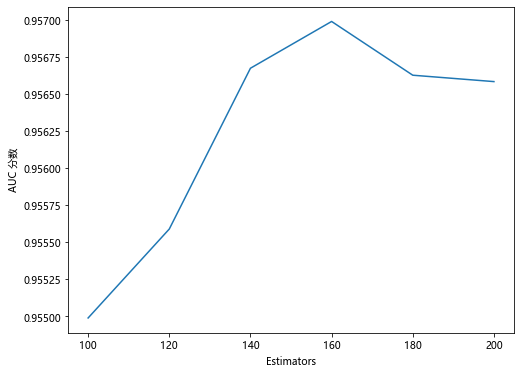

In [15]:
# 画出上一 Cell 的 AUC 折线图，反映不同 n_estimators 下的成绩
def anonymous_func():
    scores_test, estimators = glbl.score_estimator
    
    fig, ax = plt.subplots(figsize=(8, 6))

    # 设置x y坐标名称
    ax.set_xlabel('Estimators')
    ax.set_ylabel('AUC 分数')
    plt.plot(estimators, scores_test, label='测试集')

anonymous_func()

In [16]:
# 基于网格调参，测试不同的 n_estimators 是否能改善模型性能
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['raw_data']
    
    tuned_parameters = {
        'n_estimators': np.arange(150, 170, 2)
    }

    gs_rfc = GridSearchCV(
        estimator=RandomForestClassifier(random_state=RANDOM_STATE), param_grid=tuned_parameters,
        scoring='roc_auc', n_jobs=-1, cv=4, verbose=2)
    gs_rfc.fit(X_train, y_train)
    
    glbl.gs_rfc__n_estimators = gs_rfc

anonymous_func()

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.7min finished


"最佳参数：{'n_estimators': 166}"

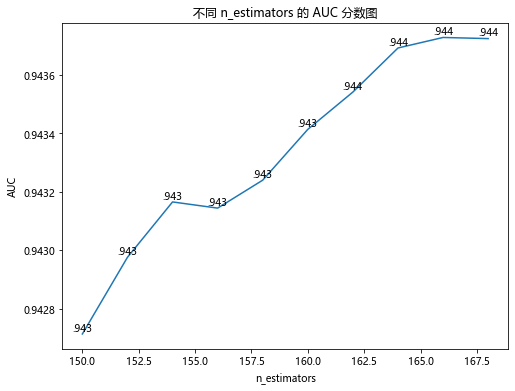

In [17]:
# 绘制出不同 n_estimators 的 AUC 分数图
def anonymous_func(gs_rfc):
    gs_rfc.cv_results_['param_n_estimators']
    gs_rfc.cv_results_['mean_test_score']

    fig, ax = plt.subplots(figsize=(8, 6))

    sns.lineplot(x=gs_rfc.cv_results_['param_n_estimators'], 
                 y=gs_rfc.cv_results_['mean_test_score'], ax=ax)

    ax.set_title('不同 n_estimators 的 AUC 分数图')
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('AUC')

    # 标注具体值
    for x, y in zip(gs_rfc.cv_results_['param_n_estimators'], gs_rfc.cv_results_['mean_test_score']):
        ax.text(x, y, str(np.round(y, 3)).replace('0.', '.'), va='bottom', ha='center')
        
    return f'最佳参数：{gs_rfc.best_params_}'

anonymous_func(glbl.gs_rfc__n_estimators)

In [18]:
# 测试 10-35 间不同的 max_depth
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['raw_data']    
    
    # 使用 GridSearchCV 来并行计算，节省训练时间
    tuned_parameters = {
        'max_depth': np.arange(5, 21, 3)
    }

    gs_rfc =  GridSearchCV(
        estimator=RandomForestClassifier(n_estimators=166, random_state=RANDOM_STATE), param_grid=tuned_parameters,
        scoring='roc_auc', n_jobs=-1, cv=4, verbose=2)
    gs_rfc.fit(X_train, y_train)
    
    glbl.gs_rfc__max_depth = gs_rfc

anonymous_func()

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:   46.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   46.9s finished


Best params: {'max_depth': 20}
AUC: 0.950429


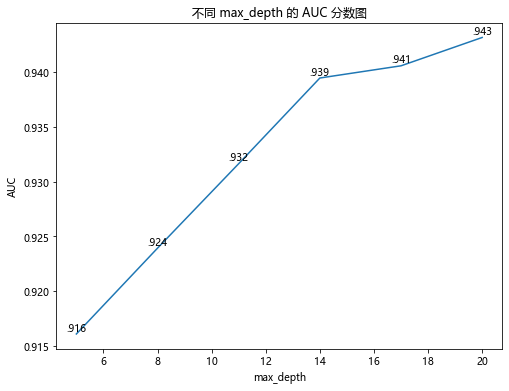

In [19]:
def anonymous_func(gs_rfc):
    X_train, X_test, y_train, y_test = test_packs['raw_data']
    print('Best params:', gs_rfc.best_params_)
    
    print('AUC:', cutil.roc_auc_test(gs_rfc.best_estimator_, test_packs['raw_data']))

    fig, ax = plt.subplots(figsize=(8, 6))

    sns.lineplot(x=gs_rfc.cv_results_['param_max_depth'], 
                 y=gs_rfc.cv_results_['mean_test_score'], ax=ax)

    for x, y in zip(gs_rfc.cv_results_['param_max_depth'], gs_rfc.cv_results_['mean_test_score']):
            ax.text(x, y, str(np.round(y, 3)).replace('0.', '.'), va='bottom', ha='center')

    ax.set_title('不同 max_depth 的 AUC 分数图')
    ax.set_xlabel('max_depth')
    ax.set_ylabel('AUC')
    
anonymous_func(glbl.gs_rfc__max_depth)

In [20]:
glbl.gs_rfc__max_depth.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=166,
                       n_jobs=None, oob_score=False, random_state=233,
                       verbose=0, warm_start=False)

## SVM
----

In [10]:
@cutil.time_it
def anonymous_func():
    glbl.linear_svc_default = cutil.default_param_on_model(SVC(
        kernel='linear',
        random_state=RANDOM_STATE,
        class_weight='balanced', max_iter=100000), test_packs)
    
anonymous_func()

cut(data): {'test accuracy': 0.742368, 'train accuracy': 0.744381, 'time': 334.77472}


c:\python37\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


minmax(data): {'test accuracy': 0.796028, 'train accuracy': 0.798759, 'time': 73.441964}
minmax(pca(std(data))): {'test accuracy': 0.832154, 'train accuracy': 0.832616, 'time': 68.363616}


c:\python37\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


pca(std(data)): {'test accuracy': 0.876413, 'train accuracy': 0.875584, 'time': 113.752193}


c:\python37\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


qcut(data): {'test accuracy': 0.948241, 'train accuracy': 0.948026, 'time': 332.777044}


c:\python37\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


raw_data: {'test accuracy': 0.157811, 'train accuracy': 0.162366, 'time': 11.754956}


c:\python37\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


std(data): {'test accuracy': 0.882222, 'train accuracy': 0.881579, 'time': 118.710281}

[Function executed for: 1408.46625s]



In [12]:
@cutil.time_it
def anonymous_func():
    glbl.svc_default = cutil.default_param_on_model(SVC(
        kernel='rbf',
        random_state=RANDOM_STATE, cache_size=8192,
        class_weight='balanced', max_iter=100000, gamma='scale'), test_packs)

anonymous_func()

cut(data): {'test accuracy': 0.893842, 'train accuracy': 0.891985, 'time': 326.021825}
minmax(data): {'test accuracy': 0.853914, 'train accuracy': 0.8651, 'time': 150.265902}
minmax(pca(std(data))): {'test accuracy': 0.91782, 'train accuracy': 0.918896, 'time': 120.285789}
pca(std(data)): {'test accuracy': 0.962396, 'train accuracy': 0.96477, 'time': 104.632602}
qcut(data): {'test accuracy': 0.976444, 'train accuracy': 0.988591, 'time': 243.229271}
raw_data: {'test accuracy': 0.879265, 'train accuracy': 0.881738, 'time': 188.219933}
std(data): {'test accuracy': 0.961762, 'train accuracy': 0.963449, 'time': 106.139377}

[Function executed for: 1676.226325s]



In [21]:
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['qcut(data)']

    svc = SVC(kernel='rbf',
              random_state=RANDOM_STATE, cache_size=8192,
              class_weight='balanced', max_iter=100000, gamma='scale')
    svc.fit(X_train, y_train)

    trained_models.svm_best = svc
    return svc

anonymous_func()

SVC(C=1.0, cache_size=8192, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100000, probability=False, random_state=233, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
cutil.persistent(trained_models.svm_best, 'SVM.model')

## MLP
----

In [15]:
glbl.mlp_default_res = cutil.default_param_on_model(
    MLPClassifier(random_state=RANDOM_STATE, max_iter=500),
    test_packs)

cut(data): {'test auc': 0.847915, 'train auc': 0.985561, 'time': 111.021518}
minmax(data): {'test auc': 0.929511, 'train auc': 0.975534, 'time': 38.011461}
minmax(pca(std(data))): {'test auc': 0.911658, 'train auc': 0.91615, 'time': 54.635727}
pca(std(data)): {'test auc': 0.920668, 'train auc': 0.998729, 'time': 67.610267}
qcut(data): {'test auc': 0.932023, 'train auc': 0.999966, 'time': 38.235463}
raw_data: {'test auc': 0.852379, 'train auc': 0.873947, 'time': 48.458694}
std(data): {'test auc': 0.926704, 'train auc': 0.996497, 'time': 60.298745}


In [16]:
pd.DataFrame.from_dict(glbl.mlp_default_res, orient='index')

,test auc,train auc,time
cut(data),0.847915,0.985561,111.021518
minmax(data),0.929511,0.975534,38.011461
minmax(pca(std(data))),0.911658,0.916150,54.635727
pca(std(data)),0.920668,0.998729,67.610267
qcut(data),0.932023,0.999966,38.235463
raw_data,0.852379,0.873947,48.458694
std(data),0.926704,0.996497,60.298745


In [26]:
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['qcut(data)']    
    
    mlp = MLPClassifier(
        random_state=RANDOM_STATE, max_iter=500,
        hidden_layer_sizes=(64, 32))
    mlp.fit(X_train, y_train)
    
    glbl.mlp_64_32 = mlp
    
    return cutil.is_model_fit(mlp, test_packs['qcut(data)'])

anonymous_func()

{'test auc': 0.931587, 'train auc': 0.999995}

In [32]:
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['qcut(data)']    
    
    mlp = MLPClassifier(
        random_state=RANDOM_STATE, max_iter=500,
        hidden_layer_sizes=(1024,), alpha=0.1, verbose=1)
    mlp.fit(X_train, y_train)
    
    glbl.mlp_1024 = mlp
    
    return cutil.is_model_fit(mlp, test_packs['qcut(data)'])

anonymous_func()

Iteration 1, loss = 0.19775155
Iteration 2, loss = 0.13638865
Iteration 3, loss = 0.12111769
Iteration 4, loss = 0.11447649
Iteration 5, loss = 0.11149320
Iteration 6, loss = 0.11049179
Iteration 7, loss = 0.10845038
Iteration 8, loss = 0.10660228
Iteration 9, loss = 0.10664504
Iteration 10, loss = 0.10616067
Iteration 11, loss = 0.10568906
Iteration 12, loss = 0.10437023
Iteration 13, loss = 0.10386542
Iteration 14, loss = 0.10348004
Iteration 15, loss = 0.10295526
Iteration 16, loss = 0.10232080
Iteration 17, loss = 0.10246786
Iteration 18, loss = 0.10197464
Iteration 19, loss = 0.10144660
Iteration 20, loss = 0.10130555
Iteration 21, loss = 0.09991772
Iteration 22, loss = 0.10031484
Iteration 23, loss = 0.09937995
Iteration 24, loss = 0.09914084
Iteration 25, loss = 0.09907563
Iteration 26, loss = 0.09885227
Iteration 27, loss = 0.09838765
Iteration 28, loss = 0.09803454
Iteration 29, loss = 0.09737425
Iteration 30, loss = 0.09857799
Iteration 31, loss = 0.09734478
Iteration 32, los

{'test auc': 0.942806, 'train auc': 0.992061}

In [35]:
glbl.mlp_1024

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=233, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=1, warm_start=False)

## GBDT
----

In [8]:
glbl.gbdt_default_res = cutil.default_param_on_model(
    LGBMClassifier(is_unbalance=True, random_state=RANDOM_STATE), test_packs)
cutil.dump_to_json(glbl.gbdt_default_res, 'GBDT-DataPrefer')

cut(data): {'test auc': 0.88618, 'train auc': 0.931823, 'time': 0.438938}
minmax(data): {'test auc': 0.96443, 'train auc': 0.998509, 'time': 0.725155}
minmax(pca(std(data))): {'test auc': 0.934991, 'train auc': 0.995259, 'time': 1.420896}
pca(std(data)): {'test auc': 0.932638, 'train auc': 0.995296, 'time': 1.25226}
qcut(data): {'test auc': 0.94793, 'train auc': 0.994058, 'time': 0.51194}
raw_data: {'test auc': 0.961751, 'train auc': 0.998423, 'time': 0.749268}
std(data): {'test auc': 0.960628, 'train auc': 0.998411, 'time': 0.751554}


In [21]:
def anonymous_func():
    # Python 闭包
    X_train, X_validate, X_test, y_train, y_validate, y_test = test_validate_packs['minmax(data)']
    eval_set = [(X_validate, y_validate)]

    def target_func(params):
        lgmbc = LGBMClassifier(
            is_unbalance=True, random_state=RANDOM_STATE, silent=True,
            n_estimators=512,
            **params)
        lgmbc.fit(
            X_train, y_train, 
            eval_set=eval_set, early_stopping_rounds=20, verbose=False)
        return -cutil.roc_on_data(lgmbc, X_validate, y_validate)
    
    hp = hyperopt.hp    
    space = {
        'max_depth': hp.randint('max_depth', 9) + 3,
        'num_leaves': hp.choice('num_leaves', [255, 127, 63, 47, 31, 15]),
        'min_data_in_leaf': hp.randint('min_data_in_leaf', 30) + 10,
        'bagging_fraction': hp.choice('bagging_fraction', np.arange(0.1, 1.0, 0.2)),
        'feature_fraction': hp.choice('feature_fraction', np.arange(0.1, 1.0, 0.2)),
        'max_bin': hp.choice('max_bin', [255, 127, 63]),
        'lambda_l1': hp.choice('lambda_l1', [0.001, 0.01, 0.1, 0, 1, 10, 100]),
        'lambda_l2': hp.choice('lambda_l2', [0.001, 0.01, 0.1, 0, 1, 10, 100]),
    }
    glbl.best_lgmbc_param = hyperopt.space_eval(space, hyperopt.fmin(
        fn=target_func,
        space=space,
        algo=hyperopt.tpe.suggest,
        max_evals=1000
    ))
    return glbl.best_lgmbc_param

anonymous_func()

100%|████████████████████████████████████████████████████████| 1000/1000 [17:48<00:00,  1.33s/it, best loss: -0.961739]


{'bagging_fraction': 0.5000000000000001,
 'feature_fraction': 0.7000000000000001,
 'lambda_l1': 10,
 'lambda_l2': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_leaf': 20,
 'num_leaves': 15}

In [23]:
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['minmax(data)']
    params = {
        'bagging_fraction': 0.5000000000000001,
        'feature_fraction': 0.7000000000000001,
        'lambda_l1': 10,
        'lambda_l2': 0.01,
        'max_bin': 255,
        'max_depth': 6,
        'min_data_in_leaf': 20,
        'num_leaves': 15}

    lgmbc = LGBMClassifier(
        is_unbalance=True, random_state=RANDOM_STATE, silent=True,
        n_estimators=512,
        **params)
    lgmbc.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=False)
    trained_models.lgmbc_best = lgmbc
    
    return cutil.is_model_fit(lgmbc, test_packs['minmax(data)'])


anonymous_func()

{'test auc': 0.96606, 'train auc': 0.998883}

In [24]:
cutil.persistent(trained_models.lgmbc_best, 'GBDT(LightGBM).model')

In [ ]:
cutil.default_param_on_model(
    GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=512), test_packs)

cut(data): {'test auc': 0.887824, 'train auc': 0.901068, 'time': 140.463024}
minmax(data): {'test auc': 0.965453, 'train auc': 0.992506, 'time': 55.085802}
minmax(pca(std(data))): {'test auc': 0.933382, 'train auc': 0.974538, 'time': 92.171421}


## KNN
----

In [11]:
glbl.knn_default_res = cutil.default_param_on_model(
    KNeighborsClassifier(n_jobs=4),
    test_packs)
cutil.dump_to_json(glbl.knn_default_res, 'KNN-DataPrefer')

cut(data): {'test auc': 0.758303, 'train auc': 0.962499, 'time': 2.507933}
minmax(data): {'test auc': 0.682934, 'train auc': 0.949714, 'time': 1.654541}
minmax(pca(std(data))): {'test auc': 0.730097, 'train auc': 0.965363, 'time': 0.117041}
pca(std(data)): {'test auc': 0.833623, 'train auc': 0.984549, 'time': 0.128482}
qcut(data): {'test auc': 0.892483, 'train auc': 0.990799, 'time': 2.597383}
raw_data: {'test auc': 0.850908, 'train auc': 0.986241, 'time': 0.28946}
std(data): {'test auc': 0.833623, 'train auc': 0.984544, 'time': 0.377593}


In [20]:
@cutil.time_it
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['qcut(data)']    
    
    glbl.knn = KNeighborsClassifier(n_jobs=4)
    glbl.knn.fit(X_train, y_train)
    
    return cutil.is_model_fit(glbl.knn, test_packs['qcut(data)'])

anonymous_func()


[Function executed for: 135.442553s]



{'test auc': 0.892483, 'train auc': 0.990799}

## 模型综合评估
----

In [25]:
train_target = {
    'Logistic': ('qcut(data)', LogisticRegression(
            solver='liblinear', max_iter=1000, C=100, penalty='l2')),
    'RandomForest': ('raw_data', RandomForestClassifier(
        n_estimators=166, random_state=RANDOM_STATE, max_depth=20)),
    'MLP': ('qcut(data)', MLPClassifier(
        random_state=RANDOM_STATE, max_iter=500,
        hidden_layer_sizes=(1024,), alpha=0.1, verbose=1, early_stopping=True)),
    'SVM': ('qcut(data)', SVC(kernel='rbf',
              random_state=RANDOM_STATE, cache_size=8192,
              class_weight='balanced', max_iter=100000, gamma='scale')),
    'GBDT': ('raw_data', LGBMClassifier(
        is_unbalance=True, random_state=RANDOM_STATE, silent=True,
        n_estimators=512, bagging_fraction=0.5, feature_fraction=0.7, 
        lambda_l1=10, lambda_l2=0.01, max_bin=255, 
        max_depth=6, min_data_in_leaf=20, num_leaves=15)),
    'KNN': ('qcut(data)', KNeighborsClassifier(n_jobs=4)),    
}

def pack_data_of(model):
    return train_target[model][0]
    
train_target_skip = set()

In [9]:
evaluate_models = dict()

In [42]:
@cutil.time_it
def build_evaluate_models():
    for model_name, (pack_name, model) in train_target.items():
        print(f'[Now training: {model_name}]')
        
        X_train, X_test, y_train, y_test = test_packs[pack_name]
        cutil.TimingFit(model).fit(X_train, y_train)
        evaluate_models[model_name] = model
        
build_evaluate_models()

[Now training: Logistic]

[fit executed for: 0.446394s]

[Now training: RandomForest]

[fit executed for: 11.875659s]

[Now training: MLP]
Iteration 1, loss = 0.19775155
Iteration 2, loss = 0.13638865
Iteration 3, loss = 0.12111769
Iteration 4, loss = 0.11447649
Iteration 5, loss = 0.11149320
Iteration 6, loss = 0.11049179
Iteration 7, loss = 0.10845038
Iteration 8, loss = 0.10660228
Iteration 9, loss = 0.10664504
Iteration 10, loss = 0.10616067
Iteration 11, loss = 0.10568906
Iteration 12, loss = 0.10437023
Iteration 13, loss = 0.10386542
Iteration 14, loss = 0.10348004
Iteration 15, loss = 0.10295526
Iteration 16, loss = 0.10232080
Iteration 17, loss = 0.10246786
Iteration 18, loss = 0.10197464
Iteration 19, loss = 0.10144660
Iteration 20, loss = 0.10130555
Iteration 21, loss = 0.09991772
Iteration 22, loss = 0.10031484
Iteration 23, loss = 0.09937995
Iteration 24, loss = 0.09914084
Iteration 25, loss = 0.09907563
Iteration 26, loss = 0.09885227
Iteration 27, loss = 0.09838765
Iterat

In [130]:
cutil.persistent(evaluate_models, 'evaluate_models.dict')

In [10]:
evaluate_models = joblib.load(PREFIX + 'evaluate_models.dict')

In [77]:
@cutil.time_it
def anonymous_func():
    for model_name, model in evaluate_models.items():
        if 'SVM' == model_name:
            continue
        
        pack_for_model = train_target[model_name][0]
        model_metric = cutil.is_model_fit(model, test_packs[pack_for_model])
        print(f"{model_name}: {model_metric}")

anonymous_func()

Logistic: {'test auc': 0.922489, 'train auc': 0.920303}
RandomForest: {'test auc': 0.950429, 'train auc': 0.999934}
MLP: {'test auc': 0.942806, 'train auc': 0.992061}
GBMT: {'test auc': 0.965267, 'train auc': 0.998912}
KNN: {'test auc': 0.892483, 'train auc': 0.990799}


[Now ploting: Logistic]
[Now ploting: RandomForest]
[Now ploting: MLP]
[Now ploting: GBMT]
[Now ploting: KNN]

[Function executed for: 36.234923s]



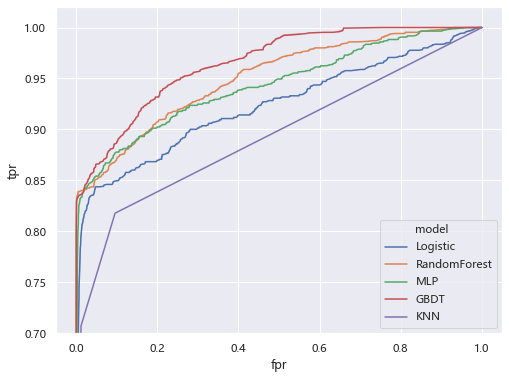

In [38]:
# 绘制 ROC 曲线
@cutil.time_it
def anonymous_func():
    df = pd.DataFrame(columns=['fpr', 'tpr', 'threshold', 'model'])
    
    for model_name, model in evaluate_models.items():
        if 'SVM' == model_name:
            continue
        
        print(f'[Now ploting: {model_name}]')
        pack_for_model = train_target[model_name][0]
        X_train, X_test, y_train, y_test = test_packs[pack_for_model]
        y_predict = model.predict_proba(X_test)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_predict)
        
        model_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': threshold})
        model_df['model'] = model_name
        
        df = df.append(model_df, ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(
        data=df, ax=ax,
        x='fpr', y='tpr', hue='model')
    ax.set_ylim(0.7, 1.02)
    
    fig.savefig(PREFIX + 'AUC.svg', format='svg')

anonymous_func()

In [20]:
def plot_some_装逼_barplot(plot_data, file_name):
    train_time = pd.DataFrame({
        'model': [*plot_data.keys()],
        'time': [*plot_data.values()],
    })
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.barplot(x='model', y='time', data=train_time, ax=ax)
    cutil.plot_value_on_bar(train_time.time, ax)
    
    fig.savefig(PREFIX + f'{file_name}.svg', format='svg')

In [ ]:
plot_some_装逼_barplot({'Logistic': 0.446394, 'RandomForest': 11.875659, 
 'MLP': 587.092937, 'SVM': 256.86868, 
 'GBDT': 1.13291, 'KNN': 2.617297}, 'TrainTime')

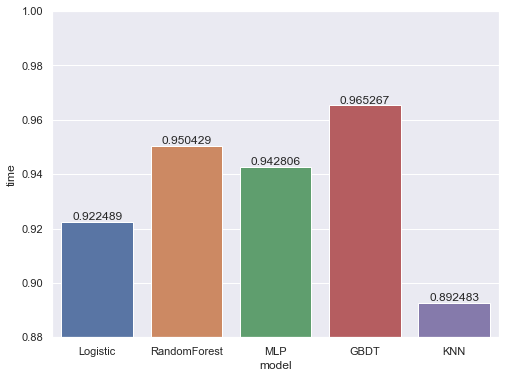

In [31]:
def anonymous_func(plot_data, file_name):
    train_time = pd.DataFrame({
        'model': [*plot_data.keys()],
        'time': [*plot_data.values()],
    })
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x='model', y='time', data=train_time, ax=ax)
    ax.set_ylim(0.88, 1.0)
    cutil.plot_value_on_bar(train_time.time, ax)    
    
    fig.savefig(PREFIX + f'{file_name}.svg', format='svg')
    
anonymous_func({'Logistic': 0.922489, 'RandomForest': 0.950429,
 'MLP': 0.942806, 'GBDT': 0.965267,
 'KNN': 0.892483}, 'ROAUC')

In [11]:
# 准备 ROC 需要的数据
model_roc_data = dict()

@cutil.time_it
def anonymous_func():
    for model_name, model in evaluate_models.items():
        if 'SVM' == model_name:
            continue
        
        print(f'[Now calculating ROC: {model_name}]')
        pack_for_model = train_target[model_name][0]
        X_train, X_test, y_train, y_test = test_packs[pack_for_model]
        y_predict = model.predict_proba(X_test)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_predict)
        
        model_roc_data[model_name] = (fpr, tpr, threshold)
anonymous_func()

[Now calculating ROC: Logistic]
[Now calculating ROC: RandomForest]
[Now calculating ROC: MLP]
[Now calculating ROC: GBMT]
[Now calculating ROC: KNN]

[Function executed for: 26.258584s]



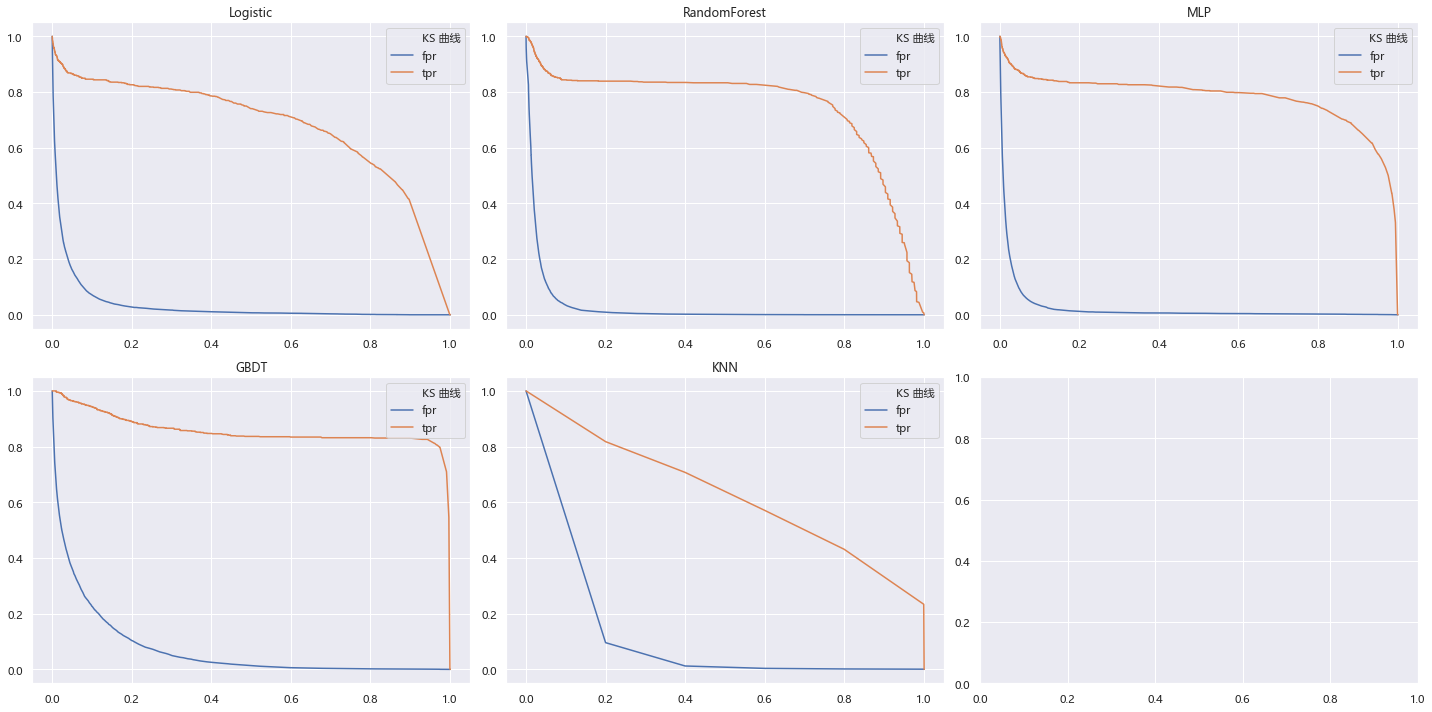

In [35]:
def anonymous_func():
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    axs = axs.flatten()
    
    for i, (model_name, roc_data) in enumerate(model_roc_data.items()):
        df = pd.DataFrame(columns=['y', 'threshold', 'type'])
    
        fpr, tpr, threshold = roc_data

        for target_name, target in zip(['fpr', 'tpr'], [fpr, tpr]):
            df_y = pd.DataFrame({'y': target, 'threshold': threshold})
            df_y['type'] = target_name

            df = df.append(df_y, ignore_index=True)

        df.loc[df.threshold > 1, 'threshold'] = 1.001
        sns.lineplot(y='y', x='threshold', hue='type', data=df, ax=axs[i])        
        
        axs[i].set_title(model_name)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')
        
        legend = axs[i].legend(loc='upper right')
        legend.texts[0].set_text("KS 曲线")
    
    plt.tight_layout()
    fig.savefig(PREFIX + f'KS.svg', format='svg')

anonymous_func()

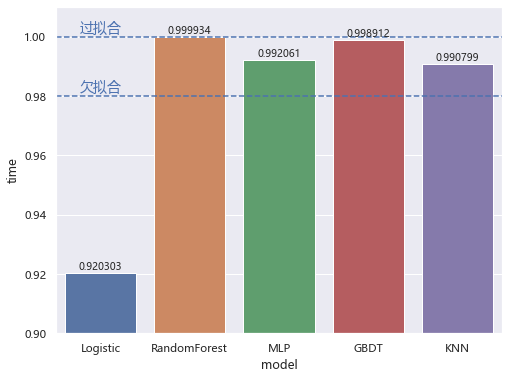

In [36]:
def anonymous_func():
    plot_data = {'Logistic': 0.920303, 'RandomForest': 0.999934,
                 'MLP': 0.992061, 'GBDT': 0.998912,
                 'KNN': 0.990799}

    train_time = pd.DataFrame({
        'model': [*plot_data.keys()],
        'time': [*plot_data.values()],
    })

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x='model', y='time', data=train_time, ax=ax)
    cutil.plot_value_on_bar(train_time.time, ax)
    
    ax.set_ylim(0.9, 1.01)
    ax.axhline(1, ls='--')
    ax.axhline(0.98, ls='--')
    ax.text(0, 1, '过拟合', ha="center", va= "bottom", fontsize=14, color='b')
    ax.text(0, 0.98, '欠拟合', ha="center", va= "bottom", fontsize=14, color='b')

    fig.savefig(PREFIX + 'ROC_Train.svg', format='svg')

anonymous_func()

In [40]:
# 求解每个模型最好的 threshold
# 并求解 F1、Accuracy、Recall
# 认为使模型 tpr - fpr 最大的位置就是最优的 threshold
def anonymous_func():
    df = pd.DataFrame(columns=['KS', 'F1', 'Accuracy', 'Recall'])
    
    for model_name, model in evaluate_models.items():
        print(f'[Now: {model_name}]')
        X_train, X_test, y_train, y_test = test_packs[train_target[model_name][0]]
        
        if model_name != 'SVM':
            fpr, tpr, threshold = model_roc_data[model_name]

            max_item = (tpr - fpr).argmax()
            ks = (tpr - fpr)[max_item]
            thre = threshold[max_item]

            y_predict = (model.predict_proba(X_test)[:, 1] >= thre).astype('int')
        else:
            y_predict = model.predict(X_test)
        data_row = pd.Series({
            'KS': ks, 'F1': f1_score(y_test, y_predict), 
            'Accuracy': accuracy_score(y_test, y_predict),
            'Recall': recall_score(y_test, y_predict),
        })
        df.loc[model_name] = data_row
        
    return df

glbl.model_traditional_metric = anonymous_func()

[Now: Logistic]
[Now: RandomForest]
[Now: MLP]
[Now: SVM]
[Now: GBMT]
[Now: KNN]


In [57]:
glbl.model_traditional_metric['GBMT'].index='GBDT'

KeyError: 'GBMT'

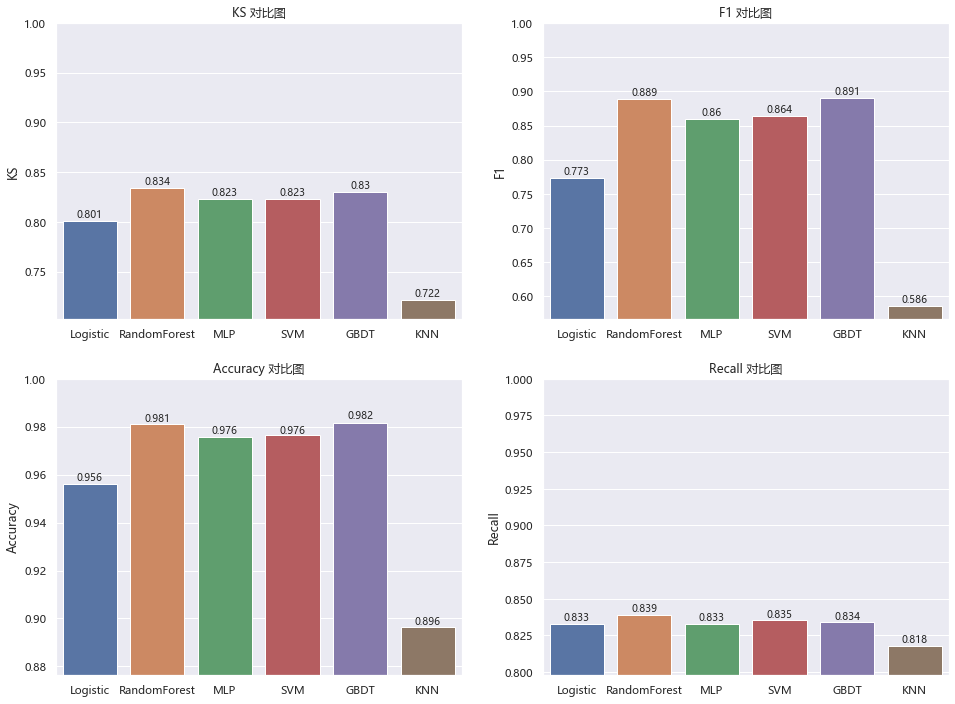

In [58]:
def plot_traditional_metric(df):
    columns = df.columns
    
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs = axs.flatten()
    
    for ax, col in zip(axs, columns): 
        sns.barplot(x=df[col].index, y=df[col], ax=ax)
        ax.set_ylim(df[col].min() - 0.02, 1)
        ax.set_title(f'{col} 对比图')
        
        cutil.plot_value_on_bar(np.round(df[col], 3), ax)
        
    fig.savefig(PREFIX + 'TraditionalMetric.svg', format='svg')

plot_traditional_metric(glbl.model_traditional_metric)

In [18]:
def anonymous_func():
    X_train, X_test, y_train, y_test = test_packs['raw_data']
    return np.round(pd.DataFrame(X_train).describe(), 3).loc['mean']
    
anonymous_func()

0         0.039
1        35.550
2        24.929
3      1465.098
4         2.110
5         1.185
6         2.125
7      6059.777
8         5.180
9         0.038
10        0.038
11        0.017
12        0.073
13    18163.164
14        0.689
15   -63271.919
16       35.316
17      131.517
18        7.639
19     5538.489
20        5.563
21        2.364
22        5.561
23    45289.720
24       19.677
25        0.159
26        0.521
27        0.320
28        0.063
29        0.398
30        0.290
31        0.181
32        0.068
33        0.544
34        0.170
35        0.287
36        0.074
37        0.729
38        0.197
39        0.102
40        0.072
41        0.080
42        0.145
43        0.600
44        0.004
45        0.560
46        0.437
47        0.383
48        0.408
49        0.208
50    38656.331
51     4387.805
52      706.150
53     -670.074
54      166.776
Name: mean, dtype: float64

In [34]:
def plot_some_务实_barplot(plot_data, file_name, ylim=None):
    df = pd.DataFrame({
        'x': [*plot_data.keys()],
        'y': [*plot_data.values()],
    })
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.barplot(x='x', y='y', data=df, ax=ax)
    cutil.plot_value_on_bar(df.y, ax)
    
    if ylim is None:
        ax.set_ylim(df.y.min() - 0.05, df.y.max() + 0.01)
    else:
        ax.set_ylim(ylim)
    
    fig.savefig(PREFIX + f'{file_name}.svg', format='svg')

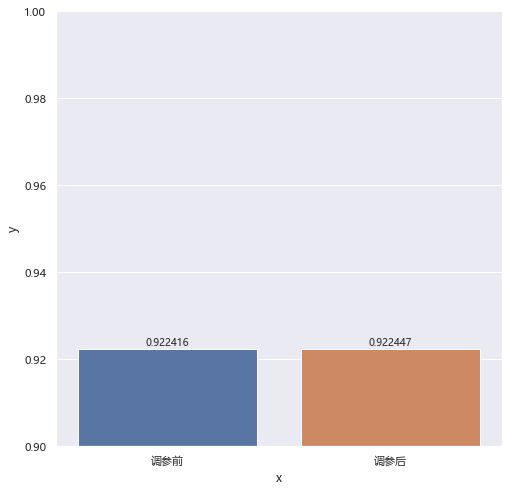

In [38]:
plot_some_务实_barplot({'调参前': 0.922416, '调参后': 0.922447}, 
                     file_name='LogisticAUC', ylim=(0.9, 1))

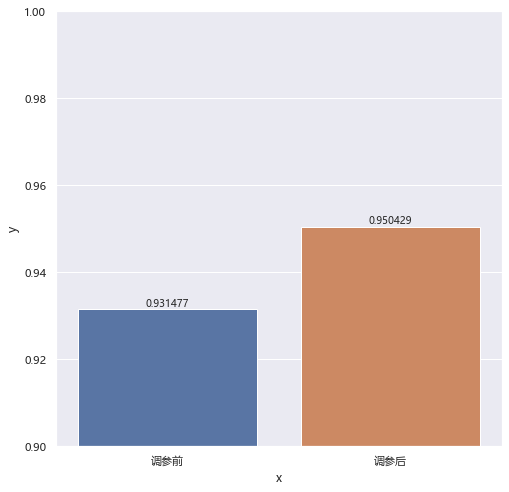

In [39]:
plot_some_务实_barplot({'调参前': 0.931477, '调参后': 0.950429}, 
                     file_name='RandomForestAUC', ylim=(0.9, 1))

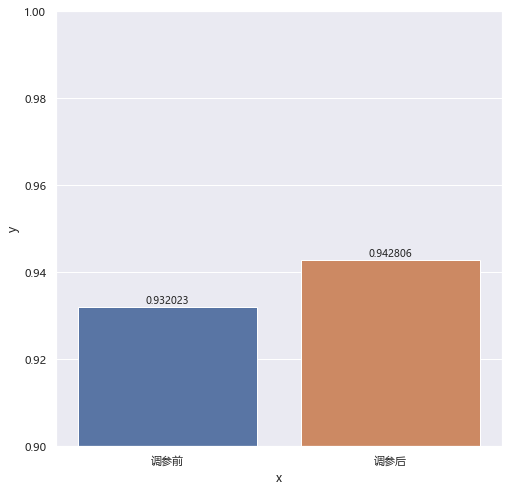

In [41]:
plot_some_务实_barplot({'调参前': 0.932023, '调参后': 0.942806}, 
                     file_name='MLP-AUC', ylim=(0.9, 1))

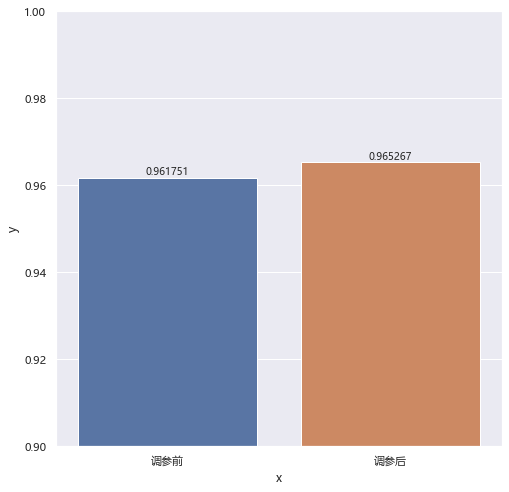

In [42]:
plot_some_务实_barplot({'调参前': 0.961751, '调参后': 0.965267}, 
                     file_name='LightGBM-AUC', ylim=(0.9, 1))

## 可解释性
----

In [53]:
evaluate_models['Logistic'].coef_

array([[-0.0295634 , -0.09179292, -0.03251821,  0.07831818,  0.16581169,
        -0.16649296, -0.15157291, -0.09207533,  0.03737211, -0.15190249,
        -0.2189432 , -0.19793132,  0.12126369, -0.04662785,  0.01405622,
        -0.37756958, -0.23512424, -0.07831278, -0.09670419,  0.49424072,
        -0.18234468, -0.61142653, -0.20719164,  0.09658091,  0.25955669,
        -0.33737938, -0.33231852, -0.31477427, -0.10448389,  0.00911695,
        -0.34063418, -0.55481922, -0.15685266,  0.27746558,  0.36469927,
        -0.03991463, -0.00403226, -0.01695838, -0.05615494, -0.293081  ,
        -0.56955406, -0.04353549,  0.07343249,  0.12951585,  0.04159561,
         0.11795582, -0.05448272, -0.51520993, -0.82487337,  0.57393895,
         0.26117095, -0.42037773, -0.03103953,  0.02241977, -0.02910603,
        -0.37241542,  0.13874397, -0.3339629 , -0.21492228, -1.31513428,
        -0.87184419, -0.54614597,  2.32298323, -0.1393478 , -0.14170393,
         0.08046545, -0.20955493,  0.14027387, -1.7

In [89]:
def model_interpret(pack_name, importance, title=None):
    coef = importance.flatten()
    importance = pd.Series(coef, index=test_data_cols[pack_name]).sort_values(ascending=False)[:5]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(y=importance.index, x=importance, ax=ax)
    if isinstance(title, str):
        ax.set_title(title)
    ax.set_xlabel('重要性权值')
    
    return fig

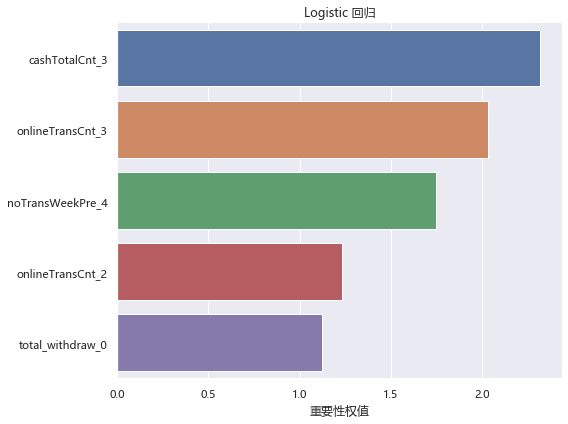

In [90]:
def anonymous_func():
    fig = model_interpret(pack_data_of('Logistic'), evaluate_models['Logistic'].coef_, title='Logistic 回归')
    plt.tight_layout()
    fig.savefig(PREFIX + 'Logistic-Interpret.svg', format='svg')
    
anonymous_func()

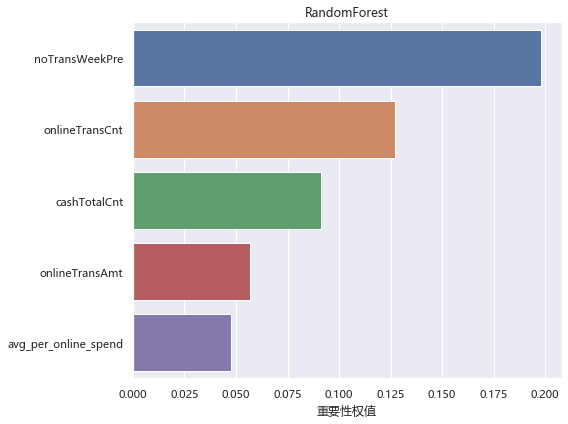

In [92]:
def anonymous_func():
    fig = model_interpret(pack_data_of('RandomForest'),
                          evaluate_models['RandomForest'].feature_importances_ ,
                          title='RandomForest')
    plt.tight_layout()
    fig.savefig(PREFIX + 'RandomForest-Interpret.svg', format='svg')
    
anonymous_func()

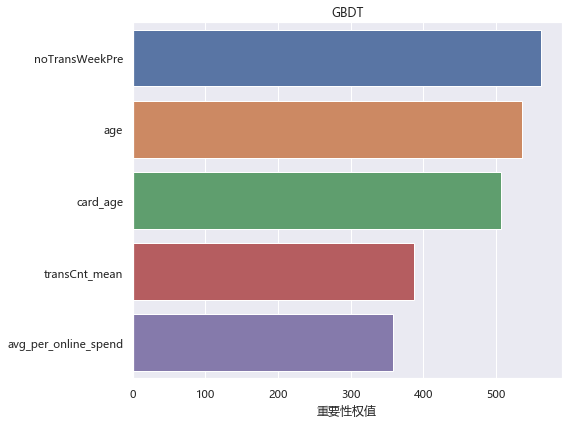

In [93]:
def anonymous_func():
    fig = model_interpret(pack_data_of('GBDT'), evaluate_models['GBDT'].feature_importances_, title='GBDT')
    plt.tight_layout()
    fig.savefig(PREFIX + 'LightGBM-Interpret.svg', format='svg')
    
anonymous_func()